In [1]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
import uproot as up
import pandas as pd
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import matplotlib.pyplot as plt

In [2]:
# dataset = '../outputs/crab_TTree_13TeV_fourmuon_2022B.root'
dataset = '../outputs/crab_TTree_13TeV_fourmuon_2018_v6.root'

In [3]:
file = up.open(dataset)
events = file['ntuple;1']
columns = ['B_J1_mass', 'B_U_TriggerPath',
           'B_Mu1_soft', 'B_Mu2_soft', 'B_Mu3_soft', 'B_Mu4_soft',
           'B_J1_VtxProb', 'B_J2_VtxProb', 'B_J3_VtxProb', 'B_J4_VtxProb']
branches = events.arrays(columns)

KeyInFileError: not found: 'B_J1_mass'
in file ../outputs/crab_TTree_13TeV_fourmuon_2018_v6.root
in object /ntuple;1

In [107]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['B_J1_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [108]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 1617
Number of events Preselection: 693


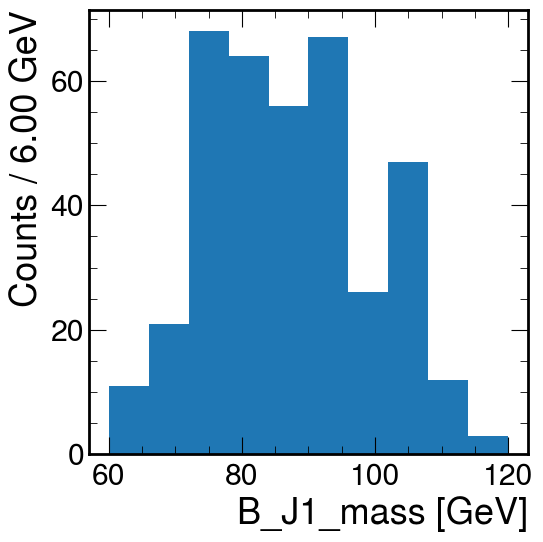

In [109]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()


In [110]:
cut_MuTrigger_candi = branches['B_U_TriggerPath']
cut_MuTrigger_event = ak.any(cut_MuTrigger_candi, axis=1)

branches = branches[cut_MuTrigger_candi][cut_MuTrigger_event]

print_summary(branches, "Trigger")

Number of candidates Trigger: 128
Number of events Trigger: 98


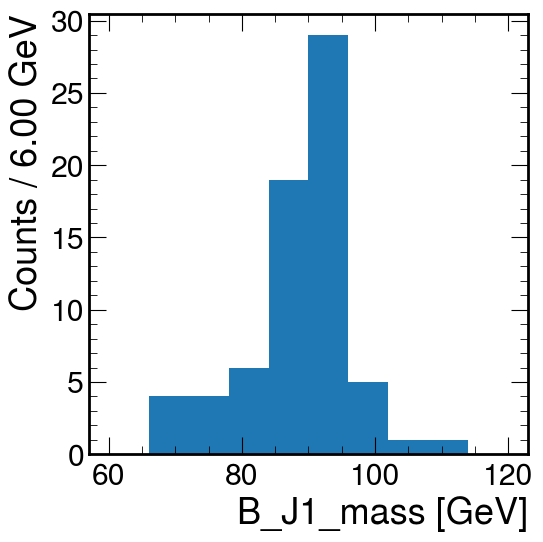

In [111]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()

In [112]:
cut_Zsoft_candi = branches['B_Mu1_soft'] & branches['B_Mu2_soft'] & branches['B_Mu3_soft'] & branches['B_Mu4_soft']
cut_Zsoft_event = ak.any(cut_Zsoft_candi, axis=1)

branches = branches[cut_Zsoft_candi][cut_Zsoft_event]

print_summary(branches, "Soft Muons")

Number of candidates Soft Muons: 21
Number of events Soft Muons: 19


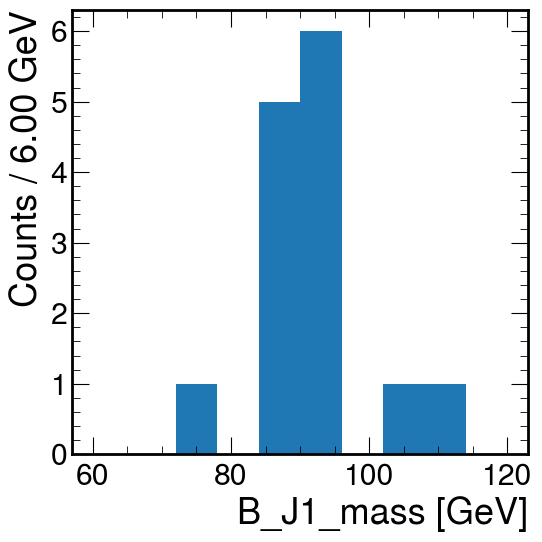

In [113]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()

Number of candidates Dilepton Vtx: 15
Number of events Dilepton Vtx: 15


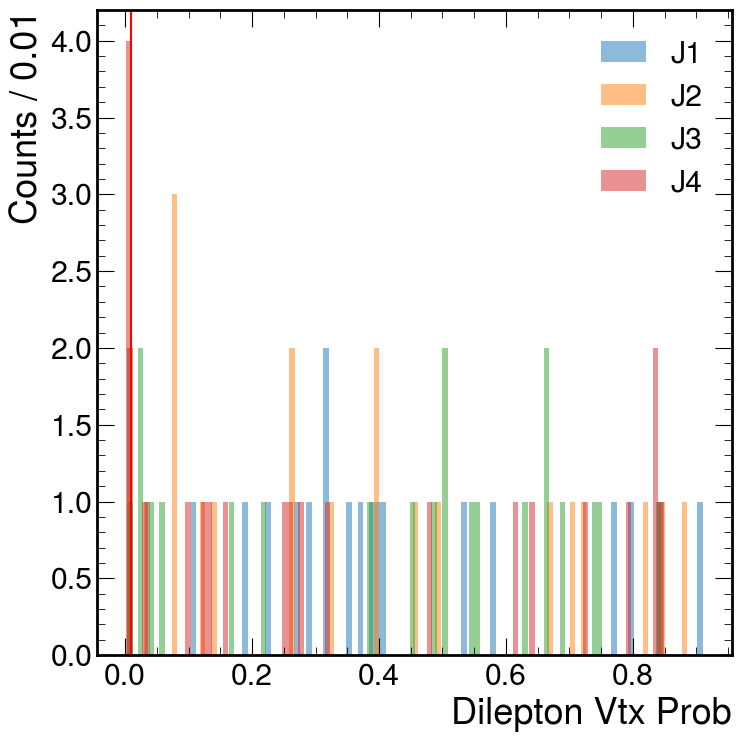

In [114]:
cut_dilepton_candi = (branches['B_J1_VtxProb'] > 0.01) & (branches['B_J2_VtxProb'] > 0.01) & (branches['B_J3_VtxProb'] > 0.01) & (branches['B_J4_VtxProb'] > 0.01)
cut_dilepton_event = ak.any(cut_dilepton_candi, axis=1)


plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 100, 0, 1
plt.hist(ak.flatten(branches.B_J1_VtxProb), bins=nbins, label="J1", alpha=0.5)
plt.hist(ak.flatten(branches.B_J2_VtxProb), bins=nbins, label="J2", alpha=0.5)
plt.hist(ak.flatten(branches.B_J3_VtxProb), bins=nbins, label="J3", alpha=0.5)
plt.hist(ak.flatten(branches.B_J4_VtxProb), bins=nbins, label="J4", alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('Dilepton Vtx Prob')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f}")
plt.legend()
plt.tight_layout()

branches = branches[cut_dilepton_candi][cut_dilepton_event]

print_summary(branches, "Dilepton Vtx")

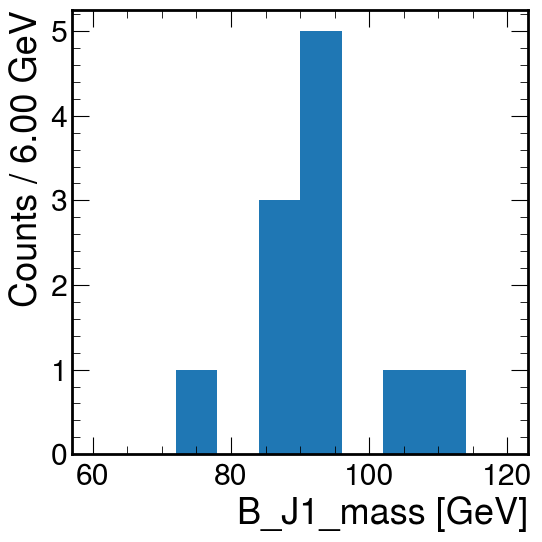

In [115]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()